# 4. Coding Up the Thin Disk Equations

We will use some of the same code as before, but this time we want to modify it to give our functions more broad uses. The more *specific* a function is, the *less* versatile it can be. So, if we want to write a function that can be used to solve a couple different problems, we need to build it with some versatility and avoid what's called "hard-coding".

Once again, here's our equation for reference:

<img src="./figures/newtonian_flux_eqn.png" alt="Flux equation" width="400"/>

In the script below I will write a generalized function to solve this equation, where the user can specify various values for both the dependent and independent variables. Later on, I will demonstrate how a generalized function like this can be used to solve multiple problems at once without rewriting any code!

In [7]:
import numpy as np
from astropy.constants import G

In [8]:
# Define a function called F with arguments r, M, Mdot, and r_in
def F(r, M, Mdot, r_in):
    flux = 3. * G.value * M * Mdot / (8. * np.pi * r**3) * (1. - np.sqrt(r_in / r))    # Calculate the flux
    return flux      # Return the flux as an output

In [9]:
# Import plotting package and tell it to show the plots right here in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
radii = np.linspace(0.001, 100, 200) # Create an array from 0 to 100 with 200 data points

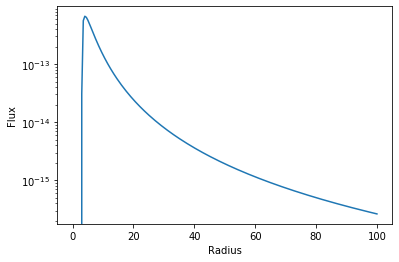

In [11]:
# Plot the data
plt.plot(radii, F(radii, M=10, Mdot=4, r_in=3))
plt.xlabel("Radius") # Set the label on the x axis
plt.ylabel("Flux") # Set the label on the y axis
plt.yscale("log")# Use a log-scale on the y axis instead of linear
plt.show()

Neat! This is the same result as before, but now instead of defining `M`, `Mdot`, and `r_in` as constants, we've used them as variables in our `F()` function. So, now when you want to calculate the flux as a function of radius, you **must** specify all those values or the function won't work. 

**What's the benefit of this?**
Previously we had set `M`, `Mdot`, and `r_in` as fixed values. If we wanted to change them, we'd have to re-run a portion of the code, or re-define those values later on in a different section of the code. This is inefficient, and more importantly, *sloppy*, so we want to restructure things in a way where the function inputs and outputs are **clear and organized**. 

Now, every time we call the function `F()`, we provide it the exact values of mass, mass accretion rate, and interior radius we want it to use. Now we can start changing those values to see what effect it has on the **radial flux profile** (fancy name for the graph shown above).

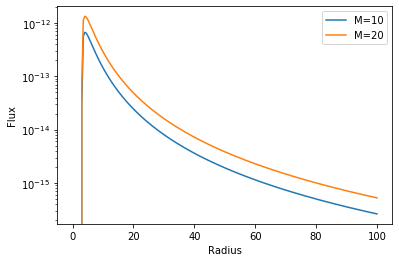

In [12]:
# Generate the data we want to plot --- flux at the values of radius we've chosen.
# Note the function call uses the additional arguments M, Mdot, and r_in.
# Here I've written the variable names for clarity, but you can also just say F(radii, 10, 4, 3),
# for example, to calculate the flux for M=10, Mdot=4, r_in=3.
data_1 = F(radii, M=10, Mdot=4, r_in=3)
data_2 = F(radii, M=20, Mdot=4, r_in=3)

# Plot the data we just made on the same graph using different labels
plt.plot(radii, data_1, label='M=10')
plt.plot(radii, data_2, label='M=20')
plt.xlabel("Radius") # Set the label on the x axis
plt.ylabel("Flux") # Set the label on the y axis
plt.yscale("log")# Use a log-scale on the y axis instead of linear
plt.legend() # Show the legend
plt.show()

And just like that, we're doing science! We've noted an **increase in flux** associated with an **increase in the mass of the central black hole** at **fixed mass accretion rate**. From the shape of the two lines, we can conclude that there's not a strong **radial dependence** in the trend shown, that is, the whole disk has gotten brighter now that we've increased the mass of the black hole at the center.

Note the changes to the code I've made to illustrate this change: I added a `label` argument to the line of code that does the plotting. This puts whatever is in quotation marks as a label on the figure.

#### Your Task:
Make the same modifications to your code so you can run the `F()` function at various values of `M`, `Mdot`, and `r_in`. Once you can produce a plot with two lines like you see above, try changing around different parameters on your own and see how the lines change. Be sure to change the labels as well to reflect which of the variables is different between the two lines. Document the results by saving the figures and recording what parameter values you used.